In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# --- 1. Load Dataset ---
df = pd.read_csv('/content/drive/MyDrive/ML/housingCalifornia.csv', usecols=['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_house_value'])
df.head()

,housing_median_age,total_rooms,total_bedrooms,median_house_value
0,41,880,129.0,452600
1,21,7099,1106.0,358500
2,52,1467,190.0,352100
3,52,1274,235.0,341300
4,52,1627,280.0,342200


In [4]:
# --- 2. Data Exploration and Preprocessing ---
print("\n--- Data Information ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   median_house_value  20640 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 645.1 KB

--- Missing Values ---
housing_median_age      0
total_rooms             0
total_bedrooms        207
median_house_value      0
dtype: int64


In [5]:
# Handle missing values in 'total_bedrooms' by imputing with the median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)
print("\n--- Missing Values after Imputation ---")
print(df.isnull().sum())


--- Missing Values after Imputation ---
housing_median_age    0
total_rooms           0
total_bedrooms        0
median_house_value    0
dtype: int64


/tmp/ipython-input-1393557973.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


In [6]:
# --- 3. Split Data ---
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Data Split Information ---")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


--- Data Split Information ---
Training set size: 16512
Testing set size: 4128


In [7]:
# --- 4. Train Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# --- 5. Make Predictions ---
y_pred = model.predict(X_test)

In [9]:
# --- 6. Evaluate Model ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\n--- Model Evaluation Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")


--- Model Evaluation Metrics ---
Mean Squared Error (MSE): 12136065823.70
Root Mean Squared Error (RMSE): 110163.81
R-squared (R² Score): 0.07


In [10]:
# --- 7. Plot Regression Line (for a single feature) ---
# Use 'total_rooms' as the single feature
X_single = df[['total_rooms']]
y_single = df['median_house_value']

In [11]:
# Split the single feature data
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y_single, test_size=0.2, random_state=42
)

In [12]:
# Train a new model with the single feature
single_feature_model = LinearRegression()
single_feature_model.fit(X_train_single, y_train_single)
y_pred_single = single_feature_model.predict(X_test_single)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_single, y=y_pred_single)
plt.plot(y_test_single, y_test_single, color='red', linestyle='--')
plt.title('Regression Line Plot (Actual vs. Predicted Values)')
plt.xlabel('Actual `median_house_value`')
plt.ylabel('Predicted `median_house_value`')
plt.grid(True)
plt.savefig('regression_line_plot_new.png')
plt.close()

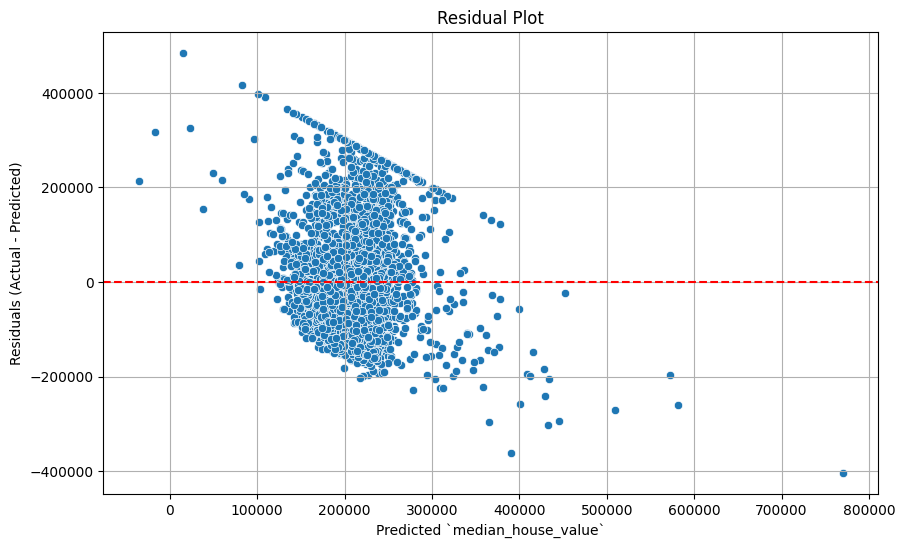

In [13]:
# --- 8. Plot Residuals ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted `median_house_value`')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.savefig('residuals_plot_new.png')
#plt.close()